# 환경설정

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive/class7/00_온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기'

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1N1s8vhguqw4WIGdcNXcBhWiF00DpHk-W/온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.8 MB/s 


In [ ]:
import category_encoders
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null

fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

mpl.rc('font', family='NanumSquareRound') 

mpl.rc('axes', unicode_minus=False)

plt.figure(figsize=(40,40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor, CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 46.4 MB/s 


In [ ]:
import os

path = '/content/gdrive/MyDrive/class7/00_온반오반 팀/핵심역량프로젝트/data/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
# 파일명 끝이 .csv인 경우

In [ ]:
df_all = pd.DataFrame()

for i in file_list_py:
    data = pd.read_csv(path + i)
    df_all = pd.concat([df_all, data])
    
df_all = df_all.sort_values(by = 'TEST_YMD',ascending=True)

In [ ]:
df_all.rename( columns = {
                   'TEST_CNT': '측정회차',
                   'CENTER_NM': '센터명',
                   'AGE_GBN': '나이구분',
                   'TEST_GBN': '측정구분',
                   'TEST_AGE': '측정나이',
                   'INPUT_GBN': '입력구분',
                   'CERT_GBN': '상장구분',
                   'TEST_YMD': '측정일',
                   'TEST_SEX': '측정회원성별',
                   'ITEM_F001': '신장',
                   'ITEM_F002': '체중',
                   'ITEM_F003': '체지방율',
                   'ITEM_F004': '허리둘레',
                   'ITEM_F005': '이완기혈압(최저)',
                   'ITEM_F006': '수축기혈압(최고)',
                   'ITEM_F007': '악력D',
                   'ITEM_F008': '악력ND',
                   'ITEM_F009': '윗몸말아올리기',
                   'ITEM_F010': '반복점프',
                   'ITEM_F011': '미정',
                   'ITEM_F012': '앉아윗몸앞으로굽히기(cm)',
                   'ITEM_F013': '일리노이',
                   'ITEM_F014': '체공시간',
                   'ITEM_F015': '협응력시간',
                   'ITEM_F016': '협응력실수횟수',
                   'ITEM_F017': '협응력계산결과값',
                   'ITEM_F018': 'BMI',
                   'ITEM_F019': '교차윗몸일으키기(회)',
                   'ITEM_F020': '20m왕복오래달리기(회)',
                   'ITEM_F021': '왕복달리기(초)',
                   'ITEM_F022': '제자리멀리뛰기(cm)',
                   'ITEM_F023': '의자에 앉았다일어서기',
                   'ITEM_F024': '6분걷기',
                   'ITEM_F025': '2분제자리걷기',
                   'ITEM_F026': '의자에앉아 3M표적 돌아오기',
                   'ITEM_F027': '8자보행',
                   'ITEM_F028': '상대악력(%)',
                   'ITEM_F029': '피두부겹합',
                   'ITEM_F030': '왕복오래달리기(VO₂max)',
                   'ITEM_F031': '트레드밀_안정시',
                   'ITEM_F032': '트레드밀_3분',
                   'ITEM_F033': '트레드밀_6분',
                   'ITEM_F034': '트레드밀_9분',
                   'ITEM_F035': '트레드밀(출력)',
                   'ITEM_F036': '스텝검사_회복시 심박수',
                   'ITEM_F037': '스텝검사(출력)',
                   'ITEM_F038': '허벅지(좌)',
                   'ITEM_F039': '허벅지(우)',
                   'ITEM_F040': '반응시간(초)',
                   'ITEM_F041': '체공시간(초)'}, inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import copy
df = copy.deepcopy(df_all)

In [ ]:
df.reset_index(drop = True, inplace = True)

# 결측치 제거

In [ ]:
df.isnull().sum()

측정회차                    0
센터명                    13
나이구분                    0
측정구분                    0
측정나이                    1
입력구분                24850
상장구분                    2
측정일                     0
측정회원성별                  1
신장                    168
체중                    176
체지방율                24858
허리둘레               419328
이완기혈압(최저)            4229
수축기혈압(최고)            4245
악력D                  2014
악력ND                 1952
윗몸말아올리기            680328
반복점프               601966
미정                 832789
앉아윗몸앞으로굽히기(cm)       2809
일리노이               483110
체공시간               497703
협응력시간              489461
협응력실수횟수            489507
협응력계산결과값           489429
BMI                    34
교차윗몸일으키기(회)        503525
20m왕복오래달리기(회)      322695
왕복달리기(초)           611240
제자리멀리뛰기(cm)        294135
의자에 앉았다일어서기        727041
6분걷기               828587
2분제자리걷기            731741
의자에앉아 3M표적 돌아오기    727137
8자보행               727995
상대악력(%)              1050
피두부겹합              832789
왕복오래달리기(VO₂m

In [ ]:
df.dropna(subset=['센터명', '측정나이', '상장구분', '측정회원성별', '신장', '체중', '체지방율', 'BMI', 
                  '악력D', '악력ND', '상대악력(%)'], inplace=True)

In [ ]:
df[['측정나이', '측정회원성별', '신장', '체중', '체지방율', 'BMI']]

,측정나이,측정회원성별,신장,체중,체지방율,BMI
0,22.0,M,173.0,75.60,16.7,25.3
1,21.0,M,175.0,80.70,29.5,26.4
2,27.0,M,171.1,75.40,20.0,25.8
3,20.0,M,177.0,64.40,14.3,20.6
4,52.0,F,152.8,51.94,23.3,22.2
...,...,...,...,...,...,...
832783,28.0,F,165.8,57.30,36.7,20.8
832785,18.0,F,165.5,60.80,29.8,22.2
832786,16.0,F,167.6,61.50,22.7,21.9
832787,18.0,M,177.7,70.90,20.2,22.5


## 1) 개인 특성

### ㄱ) 측정나이: 청소년 13세~18세

In [ ]:
df.drop(df[(df['측정나이'] < 13) | (df['측정나이'] > 18) ].index, inplace=True)

### ㄴ) 체지방율

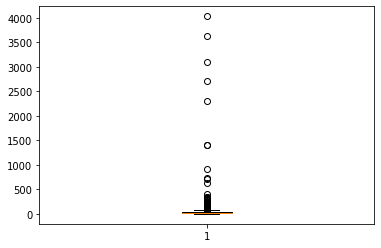

[-17.603075] 이하 삭제 [74.561845] 이상 삭제


In [ ]:
체지방율 = df['체지방율'].unique()

plt.boxplot(체지방율)
plt.show()

체지방율_q1 = np.percentile(체지방율, [25])
체지방율_q3 = np.percentile(체지방율, [75])
체지방율_iqr = 체지방율_q3 - 체지방율_q1

up_체지방 = 체지방율_q3 + (1.5 * 체지방율_iqr)
down_체지방 = 체지방율_q1 - (1.5 * 체지방율_iqr)

print(down_체지방, "이하 삭제", up_체지방, "이상 삭제")

In [ ]:
df.drop(df[(df['체지방율'] < 5) | (df['체지방율'] >= 70) ].index, inplace=True)

### ㄷ) 신장

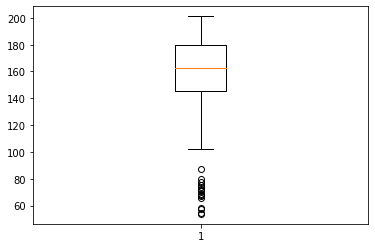

[94.35] 이하 삭제 [230.95] 이상 삭제


In [ ]:
신장 = df['신장'].unique()

plt.boxplot(신장)
plt.show()

신장_q1 = np.percentile(신장, [25])
신장_q3 = np.percentile(신장, [75])
신장_iqr = 신장_q3 - 신장_q1

up_신장 = 신장_q3 + (1.5 * 신장_iqr)
down_신장 = 신장_q1 - (1.5 * 신장_iqr)

print(down_신장, "이하 삭제", up_신장, "이상 삭제")

In [ ]:
df.drop(df[(df['신장'] < 86) | (df['신장'] >= 234) ].index, inplace=True)

### ㄹ) 체중

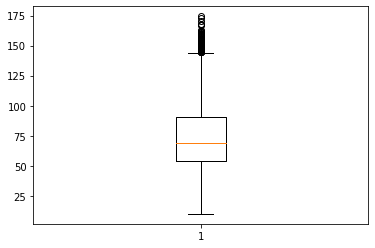

[0.2175] 이하 삭제 [144.2375] 이상 삭제


In [ ]:
체중 = df['체중'].unique()

plt.boxplot(체중)
plt.show()

체중_q1 = np.percentile(체중, [25])
체중_q3 = np.percentile(체중, [75])
체중_iqr = 체중_q3 - 체중_q1

up_체중 = 체중_q3 + (1.5 * 체중_iqr)
down_체중 = 체중_q1 - (1.5 * 체중_iqr)

print(down_체중, "이하 삭제", up_체중, "이상 삭제")

In [ ]:
df.drop(df[(df['체중'] < 20) | (df['체중'] >= 139) ].index, inplace=True)

### ㅁ) BMI

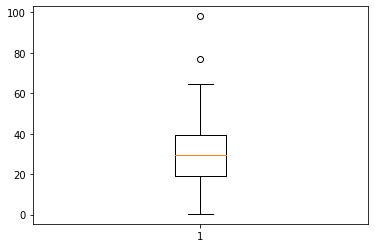

[-10.85] 이하 삭제 [69.35] 이상 삭제


In [ ]:
BMI = df['BMI'].unique()

plt.boxplot(BMI)
plt.show()

BMI_q1 = np.percentile(BMI, [25])
BMI_q3 = np.percentile(BMI, [75])
BMI_iqr = BMI_q3 - BMI_q1

up_BMI = BMI_q3 + (1.5 * BMI_iqr)
down_BMI = BMI_q1 - (1.5 * BMI_iqr)

print(down_BMI, "이하 삭제", up_BMI, "이상 삭제")

In [ ]:
df.drop(df[(df['BMI'] < 10) | (df['BMI'] >= 70) ].index, inplace=True)

## 2) 체력 측정 항목

* 심폐지구력
* 근력
* 근지구력
* 유연성
* 민첩성
* 순발력
* 협응력

### ㄱ) 심폐지구력

* 왕복오래달리기(VO₂max)

In [ ]:
df['왕복오래달리기(VO₂max)'][df['왕복오래달리기(VO₂max)'].isnull()] = df['스텝검사(출력)'][df['왕복오래달리기(VO₂max)'].isnull()==True]

In [ ]:
df['왕복오래달리기(VO₂max)'][df['왕복오래달리기(VO₂max)'].isnull()] = df['트레드밀(출력)'][df['왕복오래달리기(VO₂max)'].isnull()==True]

In [ ]:
df['왕복오래달리기(VO₂max)'].isnull().sum()

17370

In [ ]:
pd.DataFrame(df[['20m왕복오래달리기(회)','트레드밀(출력)','스텝검사(출력)','왕복오래달리기(VO₂max)']].count())

,0
20m왕복오래달리기(회),317786
트레드밀(출력),5628
스텝검사(출력),27041
왕복오래달리기(VO₂max),349192


In [ ]:
df.dropna(subset = ['왕복오래달리기(VO₂max)'], inplace = True)

In [ ]:
df['왕복오래달리기(VO₂max)'].isnull().sum()

0

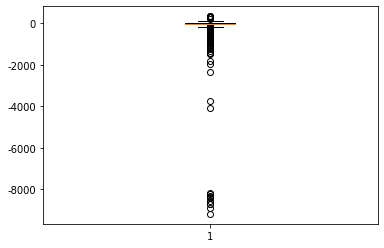

[-169.4] 이하 삭제 [163.] 이상 삭제


In [ ]:
왕복 = df['왕복오래달리기(VO₂max)'].unique()

plt.boxplot(왕복)
plt.show()

왕복_q1 = np.percentile(왕복, [25])
왕복_q3 = np.percentile(왕복, [75])
왕복_iqr = 왕복_q3 - 왕복_q1

up_왕복 = 왕복_q3 + (1.5 * 왕복_iqr)
down_왕복 = 왕복_q1 - (1.5 * 왕복_iqr)

print(down_왕복, "이하 삭제", up_왕복, "이상 삭제")

In [ ]:
df.drop(df[(df['왕복오래달리기(VO₂max)'] <= 13) | (df['왕복오래달리기(VO₂max)'] >= 65) ].index, inplace=True)

### ㄴ) 근력

* 상대악력(%)

[-23.7] 이하 삭제 [90.9] 이상 삭제


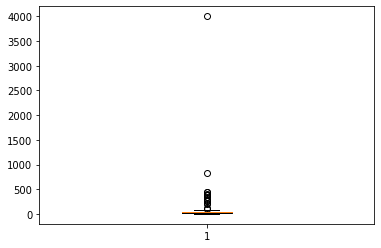

In [ ]:
악력D = df['악력D'].unique()

plt.boxplot(악력D)
plt.show

악력D_q1 = np.percentile(악력D, [25])
악력D_q3 = np.percentile(악력D, [75])
악력D_iqr = 악력D_q3 - 악력D_q1

up_악력D = 악력D_q3 + (1.5 * 악력D_iqr)
down_악력D = 악력D_q1 - (1.5 * 악력D_iqr)

print(down_악력D, "이하 삭제", up_악력D, "이상 삭제")

In [ ]:
df.drop(df[(df['악력D'] <= 0) | (df['악력D']>86)].index, inplace=True)

[-24.75] 이하 삭제 [96.85] 이상 삭제


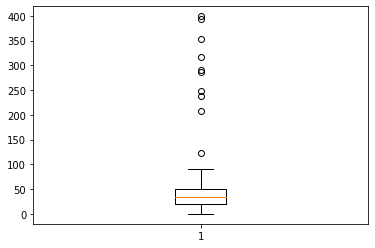

In [ ]:
악력ND = df['악력ND'].unique()

plt.boxplot(악력ND)
plt.show

악력ND_q1 = np.percentile(악력ND, [25])
악력ND_q3 = np.percentile(악력ND, [75])
악력ND_iqr = 악력ND_q3 - 악력ND_q1

up_악력ND = 악력ND_q3 + (1.5 * 악력ND_iqr)
down_악력ND = 악력ND_q1 - (1.5 * 악력ND_iqr)

print(down_악력ND, "이하 삭제", up_악력ND, "이상 삭제")

In [ ]:
df.drop(df[(df['악력ND'] <= 0) | (df['악력ND']>90)].index, inplace=True)

[-3.47375] 이하 삭제 [111.89625] 이상 삭제


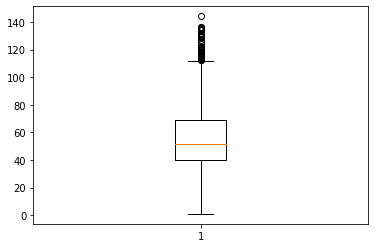

In [ ]:
상대악력 = df['상대악력(%)'].unique()

plt.boxplot(상대악력)
plt.show

상대악력_q1 = np.percentile(상대악력, [25])
상대악력_q3 = np.percentile(상대악력, [75])
상대악력_iqr = 상대악력_q3 - 상대악력_q1

up_상대악력 = 상대악력_q3 + (1.5 * 상대악력_iqr)
down_상대악력 = 상대악력_q1 - (1.5 * 상대악력_iqr)

print(down_상대악력, "이하 삭제", up_상대악력, "이상 삭제")

In [ ]:
df.drop(df[(df['상대악력(%)'] <= 0) | (df['상대악력(%)'] >= 115) ].index, inplace=True)

### ㄷ) 근지구력

* 반복점프

#### ㄷ-1) 윗몸말아올리기 이상치 제거

[-105.] 이하 삭제 [237.] 이상 삭제


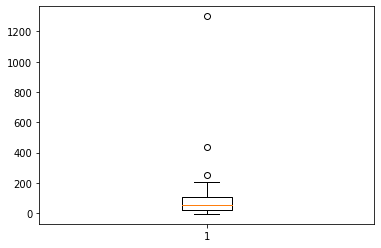

In [ ]:
윗몸 = (df['윗몸말아올리기'].dropna()).unique()

plt.boxplot(윗몸)
plt.show

윗몸_q1 = np.percentile(윗몸, [25])
윗몸_q3 = np.percentile(윗몸, [75])
윗몸_iqr = 윗몸_q3 - 윗몸_q1

up_윗몸 = 윗몸_q3 + (1.5 * 윗몸_iqr)
down_윗몸 = 윗몸_q1 - (1.5 * 윗몸_iqr)

print(down_윗몸, "이하 삭제", up_윗몸, "이상 삭제")

In [ ]:
df.drop(df[(df['윗몸말아올리기'] <= 0) | (df['윗몸말아올리기'] >= 231) ].index, inplace=True)

#### ㄷ-2) 반복점프 이상치 제거

[-50.] 이하 삭제 [146.] 이상 삭제


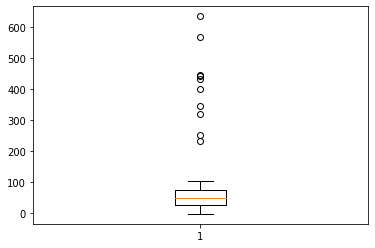

In [ ]:
반복점프 = (df['반복점프'].dropna()).unique()

plt.boxplot(반복점프)
plt.show

반복점프_q1 = np.percentile(반복점프, [25])
반복점프_q3 = np.percentile(반복점프, [75])
반복점프_iqr = 반복점프_q3 - 반복점프_q1

up_반복점프 = 반복점프_q3 + (1.5 * 반복점프_iqr)
down_반복점프 = 반복점프_q1 - (1.5 * 반복점프_iqr)

print(down_반복점프, "이하 삭제", up_반복점프, "이상 삭제")

In [ ]:
df.drop(df[(df['반복점프'] < 0) | (df['반복점프'] >= 155)].index, inplace=True)

#### ㄷ-3) 반복점프의 결측값 채우기

In [ ]:
%cd '/content/gdrive/MyDrive/class7/00_온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기/'
df_jump = pd.read_csv('select_jump_up.csv')

/content/gdrive/.shortcut-targets-by-id/1N1s8vhguqw4WIGdcNXcBhWiF00DpHk-W/온반오반 팀/핵심역량프로젝트/1. 지성_코딩자료/최적화모델찾기


In [ ]:
temp_df_jump = df[['측정회원성별', '측정나이', '반복점프', '윗몸말아올리기']]

In [ ]:
for i in df_jump.iterrows():
  temp_df_jump['반복점프'][(temp_df_jump['반복점프'].isnull()==True) & (temp_df_jump['측정회원성별'] == i[1][0]) & (temp_df_jump['측정나이'] == i[1][1]) & (temp_df_jump['윗몸말아올리기'] >i[1][2])] = np.median((temp_df_jump['반복점프'][(temp_df_jump['반복점프'].isnull()==False) & (temp_df_jump['측정회원성별'] == i[1][0]) & (temp_df_jump['측정나이'] == i[1][1]) & (temp_df_jump['반복점프'] > i[1][3])]).unique())

In [ ]:
df[['측정회원성별', '측정나이', '반복점프', '윗몸말아올리기']] = temp_df_jump

### ㄹ) 유연성

* 앉아윗몸앞으로굽히기(cm)

[-36.64] 이하 삭제 [59.56] 이상 삭제


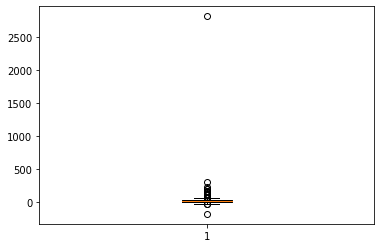

In [ ]:
앉아윗몸 = (df['앉아윗몸앞으로굽히기(cm)'].dropna()).unique()

plt.boxplot(앉아윗몸)
plt.show

앉아윗몸_q1 = np.percentile(앉아윗몸, [25])
앉아윗몸_q3 = np.percentile(앉아윗몸, [75])
앉아윗몸_iqr = 앉아윗몸_q3 - 앉아윗몸_q1

up_앉아윗몸 = 앉아윗몸_q3 + (1.5 * 앉아윗몸_iqr)
down_앉아윗몸 = 앉아윗몸_q1 - (1.5 * 앉아윗몸_iqr)

print(down_앉아윗몸, "이하 삭제", up_앉아윗몸, "이상 삭제")

In [ ]:
df.drop(df[(df['앉아윗몸앞으로굽히기(cm)'] < -28) | (df['앉아윗몸앞으로굽히기(cm)'] >= 54) ].index, inplace=True)

### ㅁ) 민첩성

[1.305] 이하 삭제 [49.965] 이상 삭제


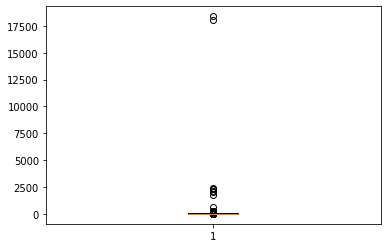

In [ ]:
일리노이 = (df['일리노이'].dropna()).unique()

plt.boxplot(일리노이)
plt.show

일리노이_q1 = np.percentile(일리노이, [25])
일리노이_q3 = np.percentile(일리노이, [75])
일리노이_iqr = 일리노이_q3 - 일리노이_q1

up_일리노이 = 일리노이_q3 + (1.5 * 일리노이_iqr)
down_일리노이 = 일리노이_q1 - (1.5 * 일리노이_iqr)

print(down_일리노이, "이하 삭제", up_일리노이, "이상 삭제")

In [ ]:
df.drop(df[(df['일리노이'] < 0) | (df['일리노이'] >= 52) ].index, inplace=True)

### ㅂ) 순발력

[-0.15] 이하 삭제 [1.222] 이상 삭제


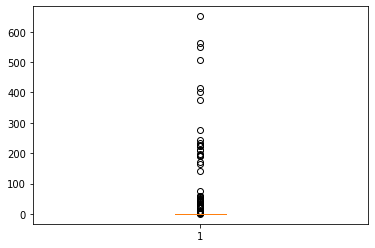

In [ ]:
체공시간 = (df['체공시간'].dropna()).unique()

plt.boxplot(체공시간)
plt.show

체공시간_q1 = np.percentile(체공시간, [25])
체공시간_q3 = np.percentile(체공시간, [75])
체공시간_iqr = 체공시간_q3 - 체공시간_q1

up_체공시간 = 체공시간_q3 + (1.5 * 체공시간_iqr)
down_체공시간 = 체공시간_q1 - (1.5 * 체공시간_iqr)

print(down_체공시간, "이하 삭제", up_체공시간, "이상 삭제")

In [ ]:
df.drop(df[(df['체공시간'] < 0) | (df['체공시간'] >= 1.2) ].index, inplace=True)

### ㅅ) 협응력

[16.132] 이하 삭제 [94.346] 이상 삭제


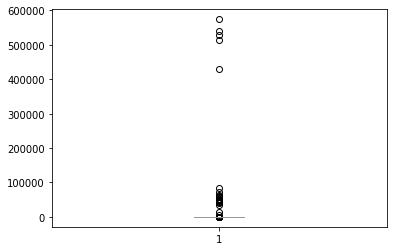

In [ ]:
협응력시간 = (df['협응력시간'].dropna()).unique()

plt.boxplot(협응력시간)
plt.show

협응력시간_q1 = np.percentile(협응력시간, [25])
협응력시간_q3 = np.percentile(협응력시간, [75])
협응력시간_iqr = 협응력시간_q3 - 협응력시간_q1

up_협응력시간 = 협응력시간_q3 + (1.5 * 협응력시간_iqr)
down_협응력시간 = 협응력시간_q1 - (1.5 * 협응력시간_iqr)

print(down_협응력시간, "이하 삭제", up_협응력시간, "이상 삭제")

In [ ]:
df.drop(df[(df['협응력시간'] <= 13) | (df['체공시간'] >= 99) ].index, inplace=True)

##### 컬럼 이름 재설정

In [ ]:
df.rename(columns={'왕복오래달리기(VO₂max)':'심폐지구력',
                   '상대악력(%)':'근력',
                   '반복점프':'근지구력',
                   '앉아윗몸앞으로굽히기(cm)':'유연성',
                   '일리노이':'민첩성',
                   '체공시간':'순발력',
                   '협응력시간':'협응력'}, inplace = True)

In [ ]:
df.columns

Index(['측정회차', '센터명', '나이구분', '측정구분', '측정나이', '입력구분', '상장구분', '측정일', '측정회원성별',
       '신장', '체중', '체지방율', '허리둘레', '이완기혈압(최저)', '수축기혈압(최고)', '악력D', '악력ND',
       '윗몸말아올리기', '근지구력', '미정', '유연성', '민첩성', '순발력', '협응력', '협응력실수횟수',
       '협응력계산결과값', 'BMI', '교차윗몸일으키기(회)', '20m왕복오래달리기(회)', '왕복달리기(초)',
       '제자리멀리뛰기(cm)', '의자에 앉았다일어서기', '6분걷기', '2분제자리걷기', '의자에앉아 3M표적 돌아오기',
       '8자보행', '근력', '피두부겹합', '심폐지구력', '트레드밀_안정시', '트레드밀_3분', '트레드밀_6분',
       '트레드밀_9분', '트레드밀(출력)', '스텝검사_회복시 심박수', '스텝검사(출력)', '허벅지(좌)', '허벅지(우)',
       '반응시간(초)', '체공시간(초)'],
      dtype='object')

# 데이터 추가

### ㄱ) 지역 데이터 추가

In [ ]:
df_center_to_local = pd.read_csv('center_to_local.csv')

In [ ]:
df_local = pd.merge(df, df_center_to_local, how="left", on="센터명")

df_local[df_local['지역'].isnull() == True]['센터명']

df_local.drop(df_local[(df_local['센터명']=="KSPO(버스)")].index, inplace = True)

df_local[df_local['지역'].isnull() == True]['센터명']

df = df_local

### ㄴ) 거리두기 데이터 추가

In [ ]:
df_sd = pd.read_csv('OWID_KOREA_COVID데이터_all.csv')

In [ ]:
df_sd = df_sd[['Day', 'containment_index(종합수치)', 'school_closures(학교 폐쇄)', 'restriction_gatherings(모임 제한)', 'stay_home_requirements(재택 요구)']]

df_sd = df_sd.rename(columns={'Day' : '측정일'})

df_merged = pd.merge(df, df_sd, how = "left", on='측정일')

df_merged = df_merged.fillna(0.0)

df_merged['school_closures(학교 폐쇄)']= (df_merged['school_closures(학교 폐쇄)']+1)*20
df_merged['restriction_gatherings(모임 제한)']=(df_merged['restriction_gatherings(모임 제한)']+1)*10
df_merged['stay_home_requirements(재택 요구)']=(df_merged['stay_home_requirements(재택 요구)']+1)*5

df = df_merged

### ㄷ) 년도, 년생 추가

In [ ]:
df['년도'] = round(df['측정일'] / 10000).astype(int)

In [ ]:
df['년생'] = df['년도'].astype('int') - df['측정나이'].astype('int')

### (No) 체지방율, 신장, 체중, BMI 구간 만들어 범위 좁히기

In [ ]:
# df_fat = pd.DataFrame(df['체지방율'])
# df_fat = df_fat.round(0)
# df["체지방율_구간"] = df_fat
# df = df.drop(columns = ['체지방율'])

In [ ]:
# df_height = pd.DataFrame(df['신장'])
# df_height = df_height.round(0)
# df["신장_구간"] = df_height
# df = df.drop(columns = ['신장'])

In [ ]:
# df_weight = pd.DataFrame(df['체중'])
# df_weight = df_weight.round(0)
# df["체중_구간"] = df_weight
# df = df.drop(columns = ['체중'])

In [ ]:
# df_bmi = pd.DataFrame(df['BMI'])
# df_bmi = df_bmi.round(0)
# df["BMI_구간"] = df_bmi
# df = df.drop(columns = ['BMI'])

# df

In [ ]:
df_1 = df[['측정일', '년생', '년도', '측정나이', '측정회원성별', '체지방율', '신장', '체중', 'BMI',
           '심폐지구력', '근력', '근지구력', '유연성', '민첩성', '순발력', '협응력',
           'school_closures(학교 폐쇄)','restriction_gatherings(모임 제한)','stay_home_requirements(재택 요구)']]

In [ ]:
df_1['근지구력'] = df_1['근지구력'].fillna(df_1.groupby(['년도','년생','측정회원성별', '측정나이'])['근지구력'].transform('mean'))
df_1['근지구력'].isnull().sum()
df_1.dropna(subset=['근지구력'], inplace=True)
df_1.isnull().sum()

측정일                              0
년생                               0
년도                               0
측정나이                             0
측정회원성별                           0
체지방율                             0
신장                               0
체중                               0
BMI                              0
심폐지구력                            0
근력                               0
근지구력                             0
유연성                              0
민첩성                              0
순발력                              0
협응력                              0
school_closures(학교 폐쇄)           0
restriction_gatherings(모임 제한)    0
stay_home_requirements(재택 요구)    0
dtype: int64

In [ ]:
df_1['심폐지구력'] = df_1['심폐지구력'].fillna(df_1.groupby(['년도','년생', '측정회원성별', '측정나이'])['심폐지구력'].transform('mean'))
df_1['심폐지구력'].isnull().sum()
df_1.dropna(subset=['심폐지구력'], inplace=True)
df_1.isnull().sum()

측정일                              0
년생                               0
년도                               0
측정나이                             0
측정회원성별                           0
체지방율                             0
신장                               0
체중                               0
BMI                              0
심폐지구력                            0
근력                               0
근지구력                             0
유연성                              0
민첩성                              0
순발력                              0
협응력                              0
school_closures(학교 폐쇄)           0
restriction_gatherings(모임 제한)    0
stay_home_requirements(재택 요구)    0
dtype: int64

In [ ]:
binary_encoder = BinaryEncoder(cols=['측정나이','측정회원성별','년생','년도']) #,'측정나이','년생','년도'])
df_1 = binary_encoder.fit_transform(df_1)
df_1

,측정일,년생_0,년생_1,년생_2,년생_3,년도_0,년도_1,년도_2,측정나이_0,측정나이_1,측정나이_2,측정회원성별_0,측정회원성별_1,체지방율,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력,school_closures(학교 폐쇄),restriction_gatherings(모임 제한),stay_home_requirements(재택 요구)
0,20180102,0,0,0,1,0,0,1,0,0,1,0,1,13.8,160.9,56.22,21.7,43.8,76.8,64.0,19.1,19.60,0.638,43.000,20.0,10.0,5.0
1,20180102,0,0,1,0,0,0,1,0,1,0,1,0,22.3,161.0,46.04,17.8,37.0,58.8,21.0,12.5,26.00,0.415,49.000,20.0,10.0,5.0
2,20180102,0,0,1,1,0,0,1,0,1,1,0,1,14.7,179.6,64.50,20.0,43.5,50.5,47.0,6.0,19.22,0.514,51.875,20.0,10.0,5.0
3,20180102,0,1,0,0,0,0,1,1,0,0,1,0,17.6,153.5,44.12,18.7,34.0,45.7,38.0,21.4,19.30,0.477,62.376,20.0,10.0,5.0
4,20180102,0,0,1,1,0,0,1,0,1,1,0,1,23.7,175.7,69.20,22.4,43.9,42.3,49.0,5.0,19.04,0.514,50.566,20.0,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285061,20220530,1,0,0,0,1,0,1,0,1,1,0,1,14.9,171.8,68.20,23.1,46.3,64.7,48.0,27.5,17.98,0.613,43.806,20.0,10.0,5.0
285062,20220530,0,1,1,0,1,0,1,1,0,1,0,1,24.4,174.1,80.80,26.7,45.0,52.6,51.0,14.4,0.00,0.603,43.537,20.0,10.0,5.0
285063,20220530,1,0,0,0,1,0,1,0,1,1,0,1,12.0,180.0,53.60,16.5,50.8,80.2,51.0,26.7,19.03,0.589,39.058,20.0,10.0,5.0
285064,20220530,0,1,1,0,1,0,1,1,0,1,0,1,12.6,177.9,56.80,17.9,51.7,66.5,52.0,11.4,17.33,0.551,52.923,20.0,10.0,5.0


In [ ]:
df_1.dropna(inplace=True)

# PolynomialFeatures

In [ ]:
# corr = df_1.corr()
# corr['체지방율'].sort_values(ascending=False)

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures 

# order = 3
# poly = PolynomialFeatures(degree=order, include_bias=False)
# poly.fit(df_1[['심폐지구력', '근력']])
# df_tt = poly.transform(df_1[['심폐지구력', '근력']]) # poly 변환 후 결과가 ndarray format임.
# df_tt

# df_1 = df_1.drop(columns=['심폐지구력', '근력'])
# df_1

# df_1 = pd.concat([df_1, pd.DataFrame(df_tt)], axis=1)

# Train

### df_X, df_y 분리

In [ ]:
df_1.head()

,측정일,년생_0,년생_1,년생_2,년생_3,년도_0,년도_1,년도_2,측정나이_0,측정나이_1,측정나이_2,측정회원성별_0,측정회원성별_1,체지방율,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력,school_closures(학교 폐쇄),restriction_gatherings(모임 제한),stay_home_requirements(재택 요구)
0,20180102,0,0,0,1,0,0,1,0,0,1,0,1,13.8,160.9,56.22,21.7,43.8,76.8,64.0,19.1,19.60,0.638,43.000,20.0,10.0,5.0
1,20180102,0,0,1,0,0,0,1,0,1,0,1,0,22.3,161.0,46.04,17.8,37.0,58.8,21.0,12.5,26.00,0.415,49.000,20.0,10.0,5.0
2,20180102,0,0,1,1,0,0,1,0,1,1,0,1,14.7,179.6,64.50,20.0,43.5,50.5,47.0,6.0,19.22,0.514,51.875,20.0,10.0,5.0
3,20180102,0,1,0,0,0,0,1,1,0,0,1,0,17.6,153.5,44.12,18.7,34.0,45.7,38.0,21.4,19.30,0.477,62.376,20.0,10.0,5.0
4,20180102,0,0,1,1,0,0,1,0,1,1,0,1,23.7,175.7,69.20,22.4,43.9,42.3,49.0,5.0,19.04,0.514,50.566,20.0,10.0,5.0


In [ ]:

#train1
# train = df_1[df_1['측정일'] < 20220101]
# test = df_1[df_1['측정일'] >= 20220101]

#train2
# train = df_1[df_1['측정일'] < 20210101]
# test = df_1[df_1['측정일'] >= 20220101]

#train3
# train = df_1[df_1['측정일'] < 20200101]
# test = df_1[df_1['측정일'] >= 20220101]

#train4
# train = df_1[(df_1['측정일'] < 20220101) & (df_1['측정일'] > 20180101)]
# test = df_1[df_1['측정일'] >= 20220101]

#train5 - 코로나 시기만
train = df_1[(df_1['측정일'] < 20220101) & (df_1['측정일'] > 20200101)]
test = df_1[df_1['측정일'] >= 20220101]

In [ ]:
train_y = train[['체지방율']]
train_X = train.drop(columns=['체지방율','측정일'])
test_y = test[['체지방율']]
test_X = test.drop(columns=['체지방율', '측정일'])

In [ ]:
train_X

,년생_0,년생_1,년생_2,년생_3,년도_0,년도_1,년도_2,측정나이_0,측정나이_1,측정나이_2,측정회원성별_0,측정회원성별_1,신장,체중,BMI,심폐지구력,근력,근지구력,유연성,민첩성,순발력,협응력,school_closures(학교 폐쇄),restriction_gatherings(모임 제한),stay_home_requirements(재택 요구)
232833,0,0,0,1,0,1,1,1,0,1,0,1,172.5,60.8,20.4,39.5,59.7,52.0,11.4,17.71,0.570,46.256,20.0,10.0,5.0
232834,0,0,0,1,0,1,1,1,0,1,1,0,159.0,59.6,23.6,39.1,44.7,51.5,18.2,18.84,0.454,61.088,20.0,10.0,5.0
232835,0,0,0,1,0,1,1,1,0,1,1,0,156.1,48.5,19.9,38.4,46.8,57.0,4.6,20.65,0.478,35.938,80.0,10.0,5.0
232836,0,0,0,1,0,1,1,1,0,1,0,1,173.7,65.2,21.6,46.3,76.5,41.5,-5.0,19.33,0.539,47.386,80.0,10.0,5.0
232837,0,0,0,1,0,1,1,1,0,1,1,0,160.7,63.3,24.5,36.1,47.2,34.0,16.8,20.52,0.471,42.323,80.0,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278527,0,0,1,1,1,0,0,1,0,1,0,1,178.8,69.2,21.6,49.8,60.0,58.0,1.6,16.69,0.557,46.104,40.0,50.0,5.0
278528,0,0,1,1,1,0,0,1,0,1,0,1,171.6,70.9,24.1,44.6,53.6,45.0,-1.3,18.98,0.588,43.254,40.0,50.0,5.0
278529,0,0,1,1,1,0,0,1,0,1,0,1,168.2,58.9,20.8,46.7,80.1,49.0,10.8,0.00,0.601,49.352,40.0,50.0,5.0
278530,0,0,1,1,1,0,0,1,0,1,0,1,183.8,74.5,22.1,47.9,69.4,52.0,14.6,16.96,0.669,43.199,40.0,50.0,5.0


In [ ]:
train_X.columns

Index(['년생_0', '년생_1', '년생_2', '년생_3', '년도_0', '년도_1', '년도_2', '측정나이_0',
       '측정나이_1', '측정나이_2', '측정회원성별_0', '측정회원성별_1', '신장', '체중', 'BMI', '심폐지구력',
       '근력', '근지구력', '유연성', '민첩성', '순발력', '협응력', 'school_closures(학교 폐쇄)',
       'restriction_gatherings(모임 제한)', 'stay_home_requirements(재택 요구)'],
      dtype='object')

In [ ]:
col1 = ['년생_0', '년생_1', '년생_2', '년생_3', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중']
# col2 = ['지역_0', '지역_1', '지역_2', '지역_3', '지역_4','년생', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중', 
#         윗몸말아올리기, 반복점프, '협응력', 20m왕복]
# col3 = ['지역_0', '지역_1', '지역_2', '지역_3', '지역_4','년생', '측정나이_0', '측정나이_1', '측정나이_2','측정회원성별_0', '측정회원성별_1', '신장', '체중']
# df.rename(columns={'왕복오래달리기(VO₂max)':'심폐지구력',
#                    '상대악력(%)':'근력',
#                    '반복점프':'근지구력',
#                    '앉아윗몸앞으로굽히기(cm)':'유연성',
#                    '일리노이':'민첩성',
#                    '체공시간':'순발력',
#                    '협응력시간':'협응력'}, inplace = True)
train_X = train_X[col1]
test_X = test_X[col1]

In [ ]:
#standard 스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures  # 표준 척도구성 장치

mm_scaler = MinMaxScaler()

In [ ]:
# standard스케일러

train_X_standard_scaler = mm_scaler.fit_transform(train_X)
train_X_standard_scaler = pd.DataFrame(train_X_standard_scaler, columns=[col for col in train_X.columns])
test_X_standard_scaler = mm_scaler.transform(test_X)
test_X_standard_scaler = pd.DataFrame(test_X_standard_scaler, columns=[col for col in test_X.columns])
test_X_standard_scaler.head()

,년생_0,년생_1,년생_2,년생_3,측정나이_0,측정나이_1,측정나이_2,측정회원성별_0,측정회원성별_1,신장,체중
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.362903
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.538829,0.353047
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.646356,0.396953
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.516129,0.308244
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.689367,0.556452


### CatBoost

In [ ]:
cb_model = CatBoostRegressor(random_state=0)

cb_model.fit(train_X_standard_scaler, train_y, early_stopping_rounds=20)

pred_train = cb_model.predict(train_X_standard_scaler)
pred_test = cb_model.predict(test_X_standard_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler  # 표준 척도구성 장치

metrics = []

for y, pred_y in [(train_y, pred_train), (test_y, pred_test)]:
    MAE = mean_absolute_error(y, pred_y)
    MSE = mean_squared_error(y, pred_y)
    RMSE = np.sqrt(mean_squared_error(y, pred_y))
    R2 = r2_score(y, pred_y)
    metrics.append((MAE, MSE, RMSE, R2))

pd.DataFrame({'train':metrics[0], 'test':metrics[1]}, index=['MAE', 'MSE', 'RMSE', 'R2'])

,train,test
MAE,3.220486,3.927780
MSE,17.104763,24.561993
RMSE,4.135790,4.956006
R2,0.809381,0.659501


### LGBM

In [ ]:
lgb_model = LGBMRegressor(num_leaves = 31, max_depth = 10, learning_rate=0.1, n_estimators=100, num_iterations = 1000)

In [ ]:
lgb_model.fit(train_X_standard_scaler, train_y)

LGBMRegressor(max_depth=10, num_iterations=1000)

In [ ]:
pred_test = lgb_model.predict(test_X_standard_scaler)

In [ ]:
# LGBM
MAE = mean_absolute_error(test_y, pred_test)
MSE = mean_squared_error(test_y, pred_test)
RMSE = np.sqrt(mean_squared_error(test_y, pred_test))
R2 = r2_score(test_y, pred_test)

pd.DataFrame([MAE,MSE, RMSE, R2], index=['MAE', 'MSE', 'RMSE', 'R2'], columns=['체지방율'])


,체지방율
MAE,3.880577
MSE,24.211650
RMSE,4.920534
R2,0.664358


### HistGradientBoostingRegressor

In [ ]:
hgb_model = HistGradientBoostingRegressor(loss = 'squared_error',
                                          learning_rate = 0.03490658015496978,
                                          max_iter = 18573,
                                          max_depth = 9,
                                          max_leaf_nodes = 10,
                                          l2_regularization = 101,
                                          random_state = 42,
                                          categorical_features=[0],
                                          n_iter_no_change = 150)

In [ ]:
hgb_model.fit(train_X_standard_scaler, train_y)

HistGradientBoostingRegressor(categorical_features=[0], l2_regularization=101,
                              learning_rate=0.03490658015496978, max_depth=9,
                              max_iter=18573, max_leaf_nodes=10,
                              n_iter_no_change=150, random_state=42)

In [ ]:
hgb_pred = hgb_model.predict(test_X_standard_scaler)

In [ ]:
# LGBM
MAE = mean_absolute_error(test_y, pred_test)
MSE = mean_squared_error(test_y, pred_test)
RMSE = np.sqrt(mean_squared_error(test_y, pred_test))
R2 = r2_score(test_y, pred_test)

pd.DataFrame([MAE,MSE, RMSE, R2], index=['MAE', 'MSE', 'RMSE', 'R2'], columns=['체지방율'])

,체지방율
MAE,3.880577
MSE,24.211650
RMSE,4.920534
R2,0.664358
